In [1]:
!ls ../data/

f{task}.h5		  stability_test_diversity.csv
raw			  stability_test_embeddings.pkl
stability.csv		  stability_test.h5
stability_diversity.csv   stability_train.csv
stability_embeddings.pkl  stability_train_diversity.csv
stability.h5		  stability_train_embeddings.pkl
stability_test.csv	  stability_train.h5


In [316]:
from pathlib import Path

base_path = Path("../data") 

## Original sets

In [359]:
import pandas as pd
import numpy as np

df_dset = pd.read_csv(base_path / "stability.csv")
df_train = pd.read_csv(base_path / "stability_train.csv")
df_test = pd.read_csv(base_path / "stability_test.csv")

## Check current split distribution

In [338]:
from protera_stability import ProteinStabilityDataset, load_dataset_raw, dim_reduction
from pathlib import Path
import matplotlib.pyplot as plt

In [339]:
dataset = ProteinStabilityDataset(base_path / "stability.h5" ,)
train_set = ProteinStabilityDataset(base_path / "stability_train.h5")
test_set = ProteinStabilityDataset(base_path / "stability_test.h5")

X, y = dataset.X, dataset.y
X_train, y_train = train_set.X, train_set.y
X_test, y_test = test_set.X, test_set.y

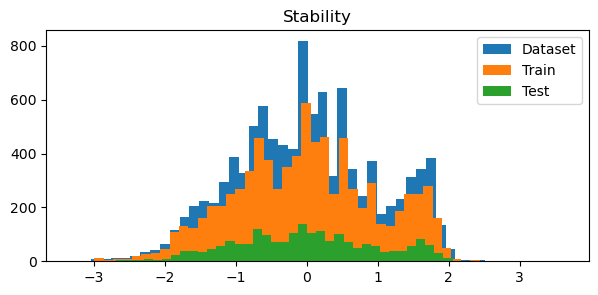

In [340]:
f, axs = plt.subplots(figsize=(7,3))

axs.hist(y, bins=50, label="Dataset")
axs.hist(y_train, bins=50, label="Train")
axs.hist(y_test, bins=50, label="Test")
axs.set_title("Stability")
axs.legend()
plt.show()

## Check diversity

In [317]:
from protera_stability import SubsetDiversitySampler
from torch.utils.data import SubsetRandomSampler

diversity_dset = pd.read_csv(base_path / "stability_diversity.csv")
diversity_train = pd.read_csv(base_path / "stability_train_diversity.csv")
diversity_test = pd.read_csv(base_path / "stability_test_diversity.csv")

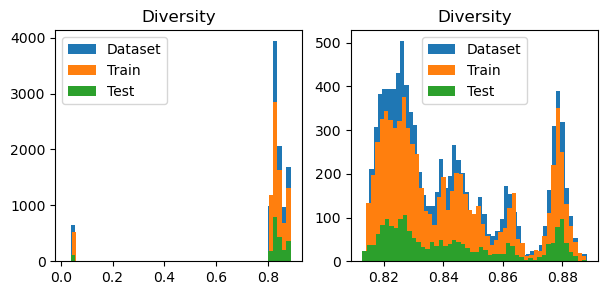

In [307]:
diversity_dset_sorted = diversity_dset.sort_values(by="diversity", ascending=True)
diversity_train_sorted = diversity_train.sort_values(by="diversity", ascending=True)
diversity_test_sorted = diversity_test.sort_values(by="diversity", ascending=True)

f, axs = plt.subplots(ncols=2, figsize=(7,3))

axs[0].hist(diversity_dset_sorted.diversity, bins=50, label="Dataset")
axs[0].hist(df_train_sorted.diversity, bins=50, label="Train")
axs[0].hist(df_test_sorted.diversity, bins=50, label="Test")
axs[0].set_title("Diversity")
axs[0].legend()

axs[1].hist(diversity_dset_sorted.diversity[1000:], bins=50, label="Dataset")
axs[1].hist(df_train_sorted.diversity[700:], bins=50, label="Train")
axs[1].hist(df_test_sorted.diversity[150:], bins=50, label="Test")
axs[1].set_title("Diversity")
axs[1].legend()
plt.show()



## Check if all have files have the same order

In [313]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

bytes_to_str = lambda x : x.decode("utf8")

### Full Dataset

#### Sequences

In [323]:
sum(df_dset.sequence.values == diversity_dset.sequence.values), sum(df_dset.sequence.values ==list(map(bytes_to_str, dataset.sequences)))

(10281, 10281)

#### Labels

In [387]:
y = scaler.fit_transform(df_dset.consensus_stability_score.values.reshape(-1, 1)).reshape(-1)

In [388]:
sum(df_dset.consensus_stability_score.values == diversity_dset.consensus_stability_score.values), sum(np.isclose(y, dataset.y, 1e-04))

(10281, 10281)

### Train Set

#### Sequences

In [355]:
sum(diversity_train.sequence.values == df_train.sequence.values)

8204

In [356]:
sum(diversity_train.sequence.values == list(map(bytes_to_str, train_set.sequences))), len(diversity_train)

(8204, 8204)

#### Labels

In [389]:
y = scaler.fit_transform(df_train.consensus_stability_score.values.reshape(-1, 1)).reshape(-1)

In [392]:
sum(df_train.consensus_stability_score.values == diversity_train.consensus_stability_score.values), sum(np.isclose(y, train_set.y, 1e-04))

(8204, 8204)

### Test Set

In [360]:
sum(diversity_test.sequence.values == df_test.sequence.values)

2077

In [361]:
sum(diversity_test.sequence.values == list(map(bytes_to_str, test_set.sequences))), len(diversity_test)

(2077, 2077)

#### Labels

In [393]:
y = scaler.fit_transform(df_test.consensus_stability_score.values.reshape(-1, 1)).reshape(-1)

In [395]:
sum(df_test.consensus_stability_score.values == diversity_test.consensus_stability_score.values), sum(np.isclose(y, test_set.y, 1e-03))

(2077, 2077)

## Check if embeddings have duplication